In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import seaborn as sns

from scipy.stats import norm, skew
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from scipy.stats import zscore 
import warnings
warnings.filterwarnings('ignore')

In [3]:
diab_df = pd.read_csv('diabetic_data.csv') 

In [4]:
pd.set_option('display.max_columns', 50)
diab_df.shape

(101766, 50)

In [5]:
print(diab_df.info())
print(diab_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [6]:
diab_df.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,?,?,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,?,?,70,1,21,0,0,0,414,411,V45,7,None,None,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,?,?,73,0,12,0,0,0,428,492,250,8,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,?,?,68,2,28,0,0,0,398,427,38,8,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,?,InternalMedicine,33,3,18,0,0,0,434,198,486,8,None,None,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [7]:
# Create target column
diab_df.readmitted = diab_df.readmitted.apply(lambda x: 'Yes' if x in ['<30'] else 'No')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text yticklabel objects>)

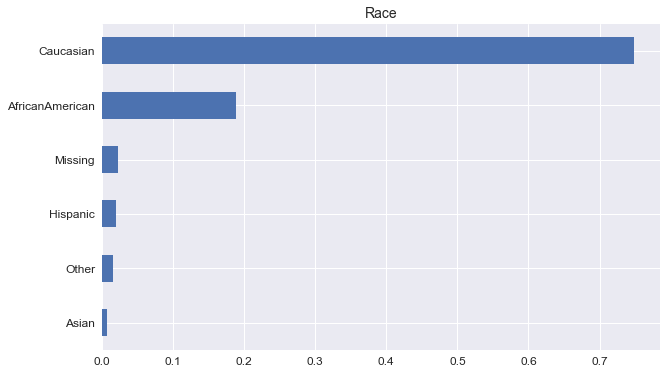

In [38]:
# Race plot
plt.figure(figsize=(10,6))
race_p = diab_df.race.value_counts().sort_values().apply(lambda x: x/diab_df.race.count()).plot(kind='barh')
plt.title('Race',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

(array([0, 1, 2]), <a list of 3 Text yticklabel objects>)

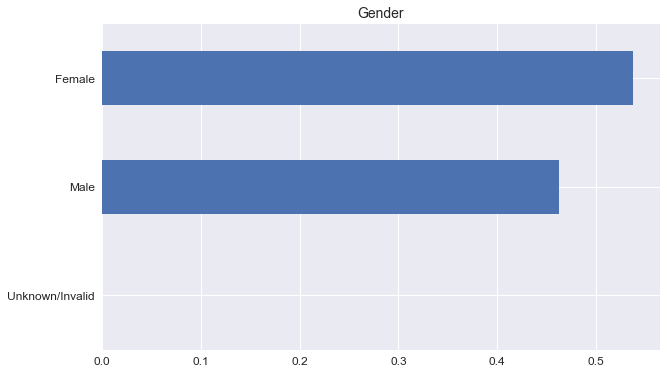

In [39]:
# Gender plot
plt.figure(figsize=(10,6))
race_p = diab_df.gender.value_counts().sort_values().apply(lambda x: x/diab_df.race.count()).plot(kind='barh')
plt.title('Gender',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text yticklabel objects>)

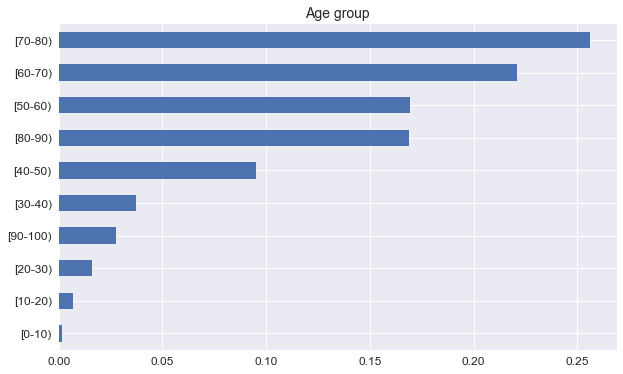

In [40]:
# Age plot
plt.figure(figsize=(10,6))
race_p = diab_df.age.value_counts().sort_values().apply(lambda x: x/diab_df.race.count()).plot(kind='barh')
plt.title('Age group',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

(array([0, 1, 2, 3]), <a list of 4 Text yticklabel objects>)

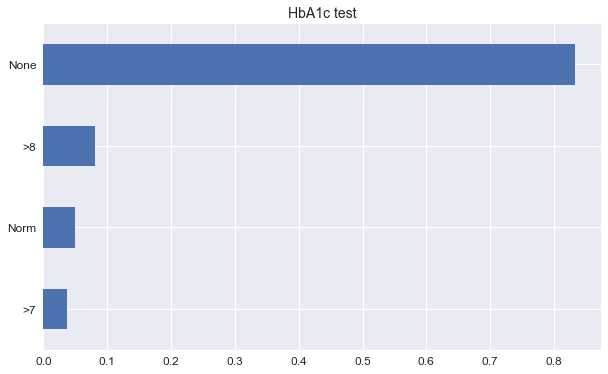

In [41]:
# HbA1c plot
plt.figure(figsize=(10,6))
race_p = diab_df.A1Cresult.value_counts().sort_values().apply(lambda x: x/diab_df.race.count()).plot(kind='barh')
plt.title('HbA1c test',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

(array([0, 1]), <a list of 2 Text yticklabel objects>)

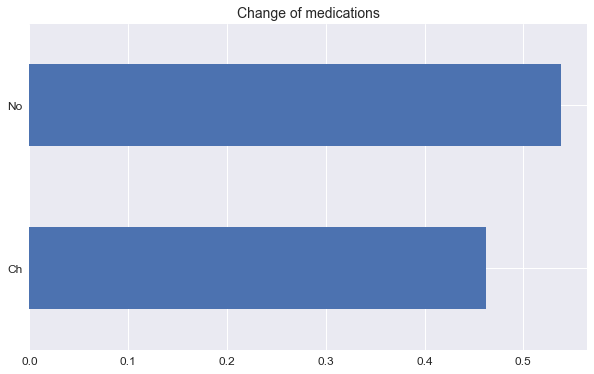

In [42]:
# Med change plot
plt.figure(figsize=(10,6))
race_p = diab_df.change.value_counts().sort_values().apply(lambda x: x/diab_df.race.count()).plot(kind='barh')
plt.title('Change of medications',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

(array([0, 1]), <a list of 2 Text yticklabel objects>)

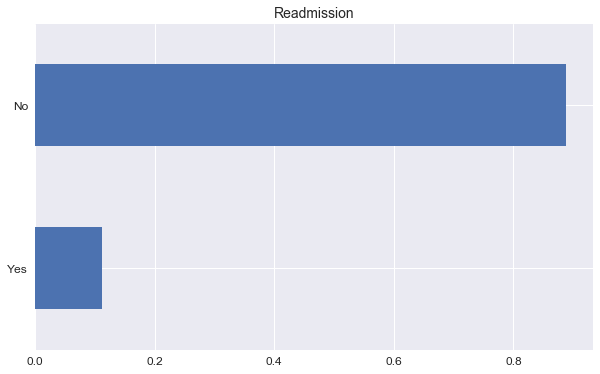

In [43]:
# Readmission plot
plt.figure(figsize=(10,6))
race_p = diab_df.readmitted.value_counts().sort_values().apply(lambda x: x/diab_df.race.count()).plot(kind='barh')
plt.title('Readmission',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Missing data

In [133]:
total = diab_df.replace('?',np.nan).replace('Unknown/Invalid',np.nan).isnull().sum().sort_values(ascending=False)
percent = (diab_df.replace('?',np.nan).replace('Unknown/Invalid',np.nan).isnull().sum()/
           diab_df.replace('?',np.nan).replace('Unknown/Invalid',np.nan).isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(8)

,Total,Percent
weight,98569,0.968585
medical_specialty,49949,0.490822
payer_code,40256,0.395574
race,2273,0.022336
diag_3,1423,0.013983
diag_2,358,0.003518
diag_1,21,0.000206
gender,3,0.000029


In [9]:
diab_df.drop(['weight','payer_code','medical_specialty'],1,inplace=True)
#diab_df.medical_specialty.replace('?','Missing',inplace=True)
diab_df.race.replace('?','Missing',inplace=True)
diab_df.diag_1.replace('?','Missing',inplace=True)
diab_df.diag_2.replace('?','Missing',inplace=True)
diab_df.diag_3.replace('?','Missing',inplace=True)

In [135]:
total = diab_df.replace('?',np.nan).isnull().sum().sort_values(ascending=False)
percent = (diab_df.replace('?',np.nan).isnull().sum()/diab_df.replace('?',np.nan).isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(8)

,Total,Percent
readmitted,0,0.0
num_medications,0,0.0
A1Cresult,0,0.0
max_glu_serum,0,0.0
number_diagnoses,0,0.0
diag_3,0,0.0
diag_2,0,0.0
diag_1,0,0.0


Column citoglipton and examide only have 'No', so drop them.

In [136]:
diab_df.drop(['citoglipton', 'examide'],1,inplace=True)

# Group diagnosis codes

In [139]:
diab_df['diag_1_group'] = diab_df['diag_1']
diab_df.loc[diab_df['diag_1'].str.contains('V'), ['diag_1_group']] = 1000
diab_df.loc[diab_df['diag_1'].str.contains('E'), ['diag_1_group']] = 1000
diab_df.loc[diab_df['diag_1'].str.contains('250'), ['diag_1_group']] = 2500
diab_df.diag_1_group.replace('Missing',-1,inplace=True)
diab_df.diag_1_group = diab_df.diag_1_group.astype(float)
diab_df.diag_1_group[((diab_df.diag_1_group>=390) & (diab_df.diag_1_group<460)) | (diab_df.diag_1_group==785)] = 1001
diab_df.diag_1_group[((diab_df.diag_1_group>=460) & (diab_df.diag_1_group<520)) | (diab_df.diag_1_group==786)] = 1002
diab_df.diag_1_group[((diab_df.diag_1_group>=520) & (diab_df.diag_1_group<580)) | (diab_df.diag_1_group==787)] = 1003
diab_df.diag_1_group[((diab_df.diag_1_group>=800) & (diab_df.diag_1_group<1000))] = 1005
diab_df.diag_1_group[((diab_df.diag_1_group>=710) & (diab_df.diag_1_group<740))] = 1006
diab_df.diag_1_group[((diab_df.diag_1_group>=580) & (diab_df.diag_1_group<630)) | (diab_df.diag_1_group==788)] = 1007
diab_df.diag_1_group[((diab_df.diag_1_group>=140) & (diab_df.diag_1_group<240))] = 1008
diab_df.diag_1_group[((diab_df.diag_1_group>=0) & (diab_df.diag_1_group<1000))] = 1000
diab_df.diag_1_group.replace(1001,'Circulatory',inplace=True)
diab_df.diag_1_group.replace(1002,'Respiratory',inplace=True)
diab_df.diag_1_group.replace(1003,'Digestive',inplace=True)
diab_df.diag_1_group.replace(2500,'Digestive',inplace=True)
diab_df.diag_1_group.replace(1005,'Injury',inplace=True)
diab_df.diag_1_group.replace(1006,'Musculoskeletal',inplace=True)
diab_df.diag_1_group.replace(1007,'Genitourinary',inplace=True)
diab_df.diag_1_group.replace(1008,'Neoplasms',inplace=True)
diab_df.diag_1_group.replace(1000,'Other',inplace=True)
diab_df.diag_1_group.replace(-1,'Missing',inplace=True)

In [140]:
diab_df['diag_2_group'] = diab_df['diag_2']
diab_df.loc[diab_df['diag_2'].str.contains('V'), ['diag_2_group']] = 1000
diab_df.loc[diab_df['diag_2'].str.contains('E'), ['diag_2_group']] = 1000
diab_df.loc[diab_df['diag_2'].str.contains('250'), ['diag_2_group']] = 2500
diab_df.diag_2_group.replace('Missing',-1,inplace=True)
diab_df.diag_2_group = diab_df.diag_2_group.astype(float)
diab_df.diag_2_group[((diab_df.diag_2_group>=390) & (diab_df.diag_2_group<460)) | (diab_df.diag_2_group==785)] = 1001
diab_df.diag_2_group[((diab_df.diag_2_group>=460) & (diab_df.diag_2_group<520)) | (diab_df.diag_2_group==786)] = 1002
diab_df.diag_2_group[((diab_df.diag_2_group>=520) & (diab_df.diag_2_group<580)) | (diab_df.diag_2_group==787)] = 1003
diab_df.diag_2_group[((diab_df.diag_2_group>=800) & (diab_df.diag_2_group<1000))] = 1005
diab_df.diag_2_group[((diab_df.diag_2_group>=710) & (diab_df.diag_2_group<740))] = 1006
diab_df.diag_2_group[((diab_df.diag_2_group>=580) & (diab_df.diag_2_group<630)) | (diab_df.diag_2_group==788)] = 1007
diab_df.diag_2_group[((diab_df.diag_2_group>=140) & (diab_df.diag_2_group<240))] = 1008
diab_df.diag_2_group[((diab_df.diag_2_group>=0) & (diab_df.diag_2_group<1000))] = 1000
diab_df.diag_2_group.replace(1001,'Circulatory',inplace=True)
diab_df.diag_2_group.replace(1002,'Respiratory',inplace=True)
diab_df.diag_2_group.replace(1003,'Digestive',inplace=True)
diab_df.diag_2_group.replace(2500,'Digestive',inplace=True)
diab_df.diag_2_group.replace(1005,'Injury',inplace=True)
diab_df.diag_2_group.replace(1006,'Musculoskeletal',inplace=True)
diab_df.diag_2_group.replace(1007,'Genitourinary',inplace=True)
diab_df.diag_2_group.replace(1008,'Neoplasms',inplace=True)
diab_df.diag_2_group.replace(1000,'Other',inplace=True)
diab_df.diag_2_group.replace(-1,'Missing',inplace=True)

In [141]:
diab_df['diag_3_group'] = diab_df['diag_3']
diab_df.loc[diab_df['diag_3'].str.contains('V'), ['diag_3_group']] = 1000
diab_df.loc[diab_df['diag_3'].str.contains('E'), ['diag_3_group']] = 1000
diab_df.loc[diab_df['diag_3'].str.contains('250'), ['diag_3_group']] = 2500
diab_df.diag_3_group.replace('Missing',-1,inplace=True)
diab_df.diag_3_group = diab_df.diag_3_group.astype(float)
diab_df.diag_3_group[((diab_df.diag_3_group>=390) & (diab_df.diag_3_group<460)) | (diab_df.diag_3_group==785)] = 1001
diab_df.diag_3_group[((diab_df.diag_3_group>=460) & (diab_df.diag_3_group<520)) | (diab_df.diag_3_group==786)] = 1002
diab_df.diag_3_group[((diab_df.diag_3_group>=520) & (diab_df.diag_3_group<580)) | (diab_df.diag_3_group==787)] = 1003
diab_df.diag_3_group[((diab_df.diag_3_group>=800) & (diab_df.diag_3_group<1000))] = 1005
diab_df.diag_3_group[((diab_df.diag_3_group>=710) & (diab_df.diag_3_group<740))] = 1006
diab_df.diag_3_group[((diab_df.diag_3_group>=580) & (diab_df.diag_3_group<630)) | (diab_df.diag_3_group==788)] = 1007
diab_df.diag_3_group[((diab_df.diag_3_group>=140) & (diab_df.diag_3_group<240))] = 1008
diab_df.diag_3_group[((diab_df.diag_3_group>=0) & (diab_df.diag_3_group<1000))] = 1000
diab_df.diag_3_group.replace(1001,'Circulatory',inplace=True)
diab_df.diag_3_group.replace(1002,'Respiratory',inplace=True)
diab_df.diag_3_group.replace(1003,'Digestive',inplace=True)
diab_df.diag_3_group.replace(2500,'Digestive',inplace=True)
diab_df.diag_3_group.replace(1005,'Injury',inplace=True)
diab_df.diag_3_group.replace(1006,'Musculoskeletal',inplace=True)
diab_df.diag_3_group.replace(1007,'Genitourinary',inplace=True)
diab_df.diag_3_group.replace(1008,'Neoplasms',inplace=True)
diab_df.diag_3_group.replace(1000,'Other',inplace=True)
diab_df.diag_3_group.replace(-1,'Missing',inplace=True)

# Simplify some conditions

In [142]:
diab_df['max_glu_serum'].replace('>300','>200',inplace=True)
diab_df['A1Cresult'].replace('>8','>7',inplace=True)

In [143]:
diab_df[['max_glu_serum','readmitted','diag_3_group']].groupby(['max_glu_serum','readmitted']).count()

diag_3_group
max_glu_serum readmitted              
>200          No                  2383
              Yes                  366
None          No                 85724
              Yes                10696
Norm          No                  2302
              Yes                  295

In [144]:
diab_df[['A1Cresult','readmitted','diag_3_group']].groupby(['A1Cresult','readmitted']).count()

diag_3_group
A1Cresult readmitted              
>7        No                 10834
          Yes                 1194
None      No                 75067
          Yes                 9681
Norm      No                  4508
          Yes                  482

# Delete multiple encounters
We considered only the first encounter for each patient as the primary admission

In [145]:
temp_df = diab_df.groupby('patient_nbr')['encounter_id'].min().reset_index()

In [146]:
temp_df = pd.merge(temp_df,diab_df.drop('patient_nbr',1),'left',left_on='encounter_id',right_on='encounter_id')

In [147]:
temp_df.shape

(71518, 48)

In [148]:
temp_df = temp_df[~temp_df['discharge_disposition_id'].isin([11,13,14,19,20,21])]

In [149]:
temp_df.shape

(69973, 48)

In [150]:
temp_df.head()

,patient_nbr,encounter_id,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,diag_1_group,diag_2_group,diag_3_group
0,135,24437208,Caucasian,Female,[50-60),2,1,1,8,77,6,33,0,0,0,401,997,560,8,None,None,Steady,No,No,No,No,No,No,Down,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,Yes,Circulatory,Injury,Digestive
1,378,29758806,Caucasian,Female,[50-60),3,1,1,2,49,1,11,0,0,0,722,305,250,3,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Musculoskeletal,Other,Digestive
2,729,189899286,Caucasian,Female,[80-90),1,3,7,4,68,2,23,0,0,0,820,493,E880,9,None,>7,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,Injury,Respiratory,Other
3,774,64331490,Caucasian,Female,[80-90),1,1,7,3,46,0,20,0,0,0,274,427,416,9,None,>7,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,No,Other,Circulatory,Circulatory
4,927,14824206,AfricanAmerican,Female,[30-40),1,1,7,5,49,0,5,0,0,0,590,220,250,3,None,None,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,Genitourinary,Neoplasms,Digestive


In [151]:
temp_df.drop('patient_nbr',1,inplace=True)
temp_df.drop('encounter_id',1,inplace=True)

# Transform nominal columns to string type

In [152]:
temp_df.admission_type_id = temp_df.admission_type_id.astype(str)
temp_df.discharge_disposition_id = temp_df.discharge_disposition_id.astype(str)
temp_df.admission_source_id = temp_df.admission_source_id.astype(str)

# Check outliers

In [153]:
num_cols = temp_df.dtypes[temp_df.dtypes != "object"].index
z = np.abs(zscore(temp_df[num_cols]))
row, col = np.where(z > 4)
df = pd.DataFrame({"row": row, "col": col})
rows_count = df.groupby(['row']).count()

outliers = rows_count[rows_count.col > 2].index
# There are three rows have more than 2 features that have z-score higher than 4
outliers

Int64Index([12442, 41188, 61606], dtype='int64', name='row')

# Standardize numeric columns

In [154]:
# Scale numeric columns
scaler = StandardScaler()
#scaler = preprocessing.RobustScaler()
temp_df[num_cols] = scaler.fit_transform(temp_df[num_cols])

In [155]:
Y = temp_df['readmitted']
temp_df.drop('readmitted',1,inplace=True)

# Dummify

In [286]:
cate_col = temp_df.dtypes[temp_df.dtypes == object].index
dummies_drop = [i + '_'+ temp_df[i].value_counts().index[0] for i in cate_col]
X = pd.get_dummies(temp_df)
X.drop(dummies_drop,axis=1,inplace=True)

# LabelEncoder

In [ ]:
cate_col = temp_df.dtypes[temp_df.dtypes == object].index
# process columns, apply LabelEncoder to categorical features
for i in cate_col:
    lbl = LabelEncoder() 
    lbl.fit(list(temp_df[i].values)) 
    temp_df[i] = lbl.transform(list(temp_df[i].values))

# Plot for Numeric features

In [243]:
temp_df.dtypes

race                        object
gender                      object
age                         object
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital             int64
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide                   object
tolbutamide         

Text(0.5, 0, 'Time in Hospital')

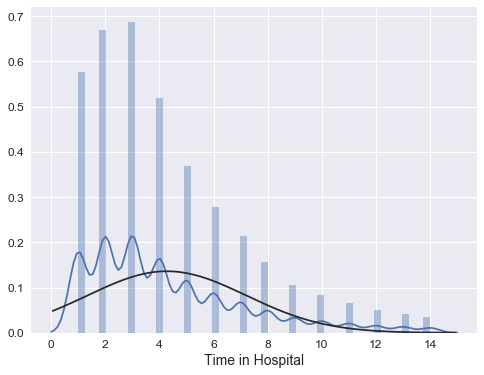

In [166]:
plt.figure(figsize=(8,6))
b = sns.distplot(temp_df.time_in_hospital, fit=norm)
b.tick_params(labelsize=12)
b.set_xlabel("Time in Hospital",fontsize=14)

Text(0.5, 0, 'Number lab procedures')

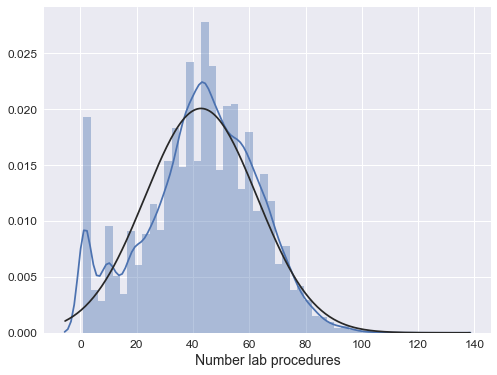

In [167]:
plt.figure(figsize=(8,6))
b = sns.distplot(temp_df.num_lab_procedures, fit=norm)
b.tick_params(labelsize=12)
b.set_xlabel("Number lab procedures",fontsize=14)

Text(0.5, 0, 'Number medications')

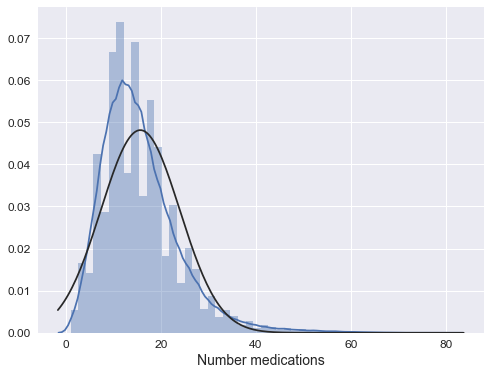

In [170]:
plt.figure(figsize=(8,6))
b = sns.distplot(temp_df.num_medications, fit=norm)
b.tick_params(labelsize=12)
b.set_xlabel("Number medications",fontsize=14)

Text(0.5, 0, 'Number of outpatient visit')

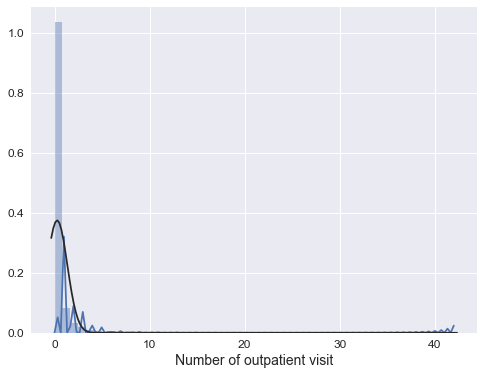

In [172]:
plt.figure(figsize=(8,6))
b = sns.distplot(temp_df.number_outpatient, fit=norm)
b.tick_params(labelsize=12)
b.set_xlabel("Number of outpatient visits",fontsize=14)

Text(0.5, 0, 'Number of emergency visits')

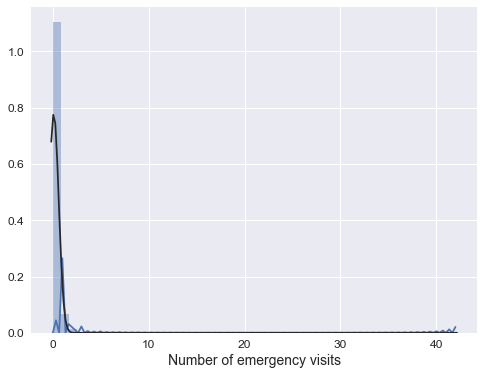

In [173]:
plt.figure(figsize=(8,6))
b = sns.distplot(temp_df.number_emergency, fit=norm)
b.tick_params(labelsize=12)
b.set_xlabel("Number of emergency visits",fontsize=14)

Text(0.5, 0, 'Number of inpatient visits')

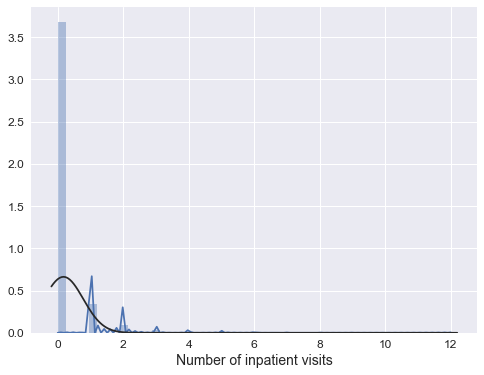

In [174]:
plt.figure(figsize=(8,6))
b = sns.distplot(temp_df.number_inpatient, fit=norm)
b.tick_params(labelsize=12)
b.set_xlabel("Number of inpatient visits",fontsize=14)

Text(0.5, 0, 'Number of diagnoses')

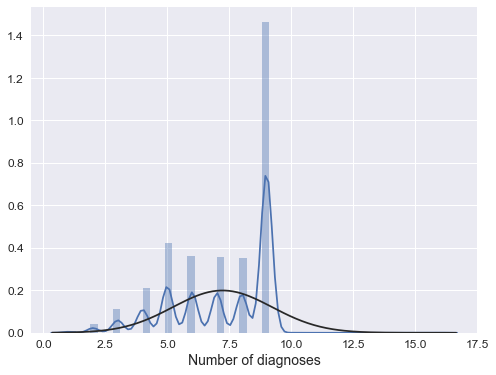

In [175]:
plt.figure(figsize=(8,6))
b = sns.distplot(temp_df.number_diagnoses, fit=norm)
b.tick_params(labelsize=12)
b.set_xlabel("Number of diagnoses",fontsize=14)

In [300]:
num_cols = temp_df.dtypes[temp_df.dtypes != "object"].index
skewed_cols = temp_df[num_cols].apply(lambda x: skew(x)).sort_values(ascending=False)

In [301]:
skewed_cols

number_emergency      21.229026
number_outpatient      9.698920
number_inpatient       5.587005
num_medications        1.434503
num_procedures         1.227526
time_in_hospital       1.179082
num_lab_procedures    -0.219637
number_diagnoses      -0.724515
dtype: float64

In [302]:
skewed_cols = skewed_cols[abs(skewed_cols) > 0.75]
skewed_features = skewed_cols.index
for feat in skewed_features:
    temp_df[feat] = boxcox1p(temp_df[feat], boxcox_normmax(temp_df[feat]+1))
#    full_data[feat] = boxcox1p(full_data[feat], lam)
#temp_df[skewed_features] = np.log1p(temp_df[skewed_features])

In [183]:
skewed_features

Index(['number_emergency', 'number_outpatient', 'number_inpatient',
       'num_medications', 'num_procedures', 'time_in_hospital',
       'encounter_id'],
      dtype='object')

Text(0.5, 0, 'Number medications')

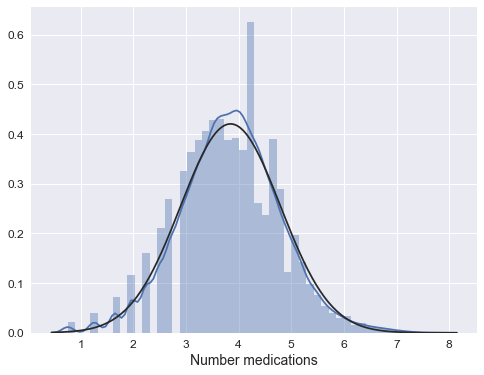

In [184]:
plt.figure(figsize=(8,6))
b = sns.distplot(temp_df.num_medications, fit=norm)
b.tick_params(labelsize=12)
b.set_xlabel("Number medications",fontsize=14)

Text(0.5, 0, 'Time in Hospital')

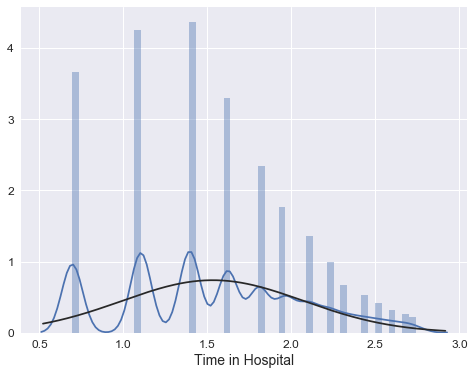

In [185]:
plt.figure(figsize=(8,6))
b = sns.distplot(temp_df.time_in_hospital, fit=norm)
b.tick_params(labelsize=12)
b.set_xlabel("Time in Hospital",fontsize=14)

Text(0.5, 0, 'Number of emergency visits')

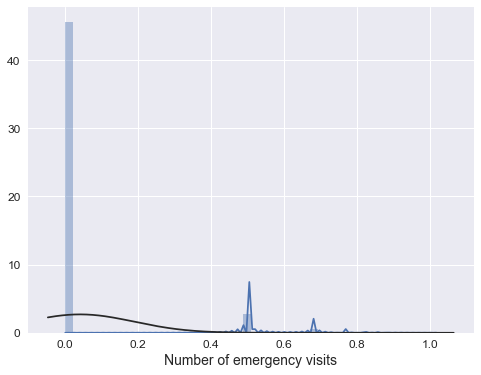

In [186]:
plt.figure(figsize=(8,6))
b = sns.distplot(temp_df.number_emergency, fit=norm)
b.tick_params(labelsize=12)
b.set_xlabel("Number of emergency visits",fontsize=14)